In [29]:
import pandas as pd

df = pd.read_csv("./Source.BiddingData.csv")

In [27]:
# Prints a summary of class instances and distribution
def data_summary(df, target=None):
    if isinstance(df, pd.DataFrame) and target!=None:
        a = df[target].value_counts()
    else:
        a = df.value_counts()
    class0 = format(100 * a[0]/sum(a), ".2f")
    class1 = format(100 * a[1]/sum(a), ".2f")

    meta = pd.DataFrame([{ "%": class0, "count": a[0]},
                         { "%": class1, "count": a[1]}])
    print("\nClass Distribution:\n", meta, "\n")

data_summary(df,'convert')


Class Distribution:
        %  count
0  87.95  10571
1  12.05   1449 



In [30]:
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('convert', axis=1)  # Features
y = df['convert']  # Target variable

rus = RandomUnderSampler(sampling_strategy={0: 9846, 1: 1629}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['convert'] = y_resampled

df_resampled.to_csv("./Source.BiddingData2.csv", index=False)

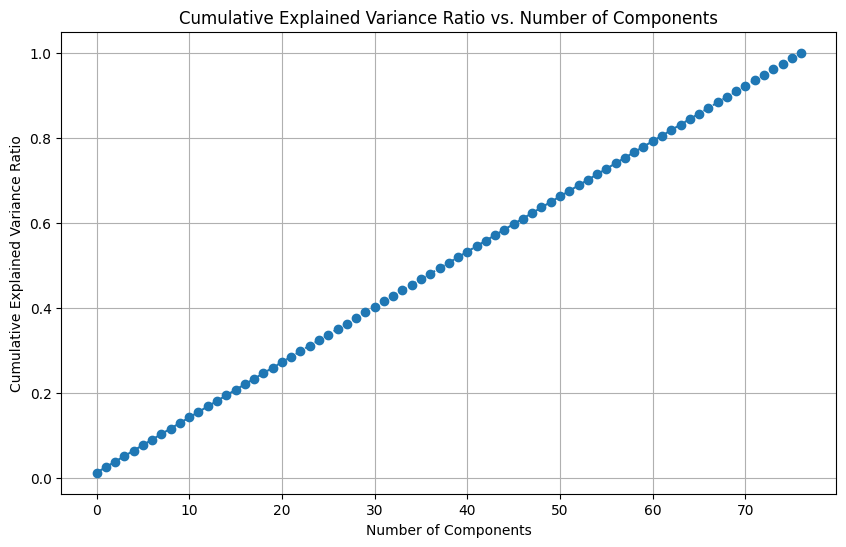

Number of components capturing 95% variance: 74


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd


df = pd.read_csv("./Source.BiddingData2.csv")

# Separate features and target
X = df.drop(columns=['convert'])  # Replace 'target_column' with the name of your target column
y = df['convert']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA to the standardized data
pca = PCA()
pca.fit(X_scaled)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.grid(True)
plt.show()

# Determine the number of components capturing 95% of the variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components capturing 95% variance:", n_components)


In [28]:
X = df.drop('convert', axis=1)  # Features
y = df['convert']  # Target variable

pca = PCA(n_components=28)
X_scaled = pca.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled)
df_scaled['convert'] = y

df_scaled.to_csv("./Source.BiddingData3.csv", index=False)

In [ ]:
df_scaled